In [0]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [0]:
from keras.utils.np_utils import to_categorical
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt


In [0]:
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_val=one_hot_train_labels[1000:]

res=model.fit(partial_x_train,partial_y_val, batch_size=512,epochs=20,validation_data=[x_val,y_val])


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 267us/step - loss: 2.6354 - accuracy: 0.4980 - val_loss: 1.7493 - val_accuracy: 0.6040
Epoch 2/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.4363 - accuracy: 0.6927 - val_loss: 1.2904 - val_accuracy: 0.7040
Epoch 3/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.0479 - accuracy: 0.7734 - val_loss: 1.1137 - val_accuracy: 0.7630
Epoch 4/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.8192 - accuracy: 0.8259 - val_loss: 1.0151 - val_accuracy: 0.7840
Epoch 5/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.6486 - accuracy: 0.8657 - val_loss: 0.9739 - val_accuracy: 0.7840
Epoch 6/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.5222 - accuracy: 0.8924 - val_loss: 0.9264 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.42

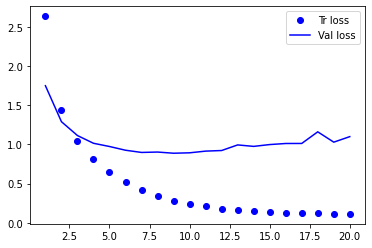

In [0]:
history_dict=res.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Tr loss')
plt.plot(epochs,val_loss_values,'b',label='Val loss')
plt.legend()
plt.show()

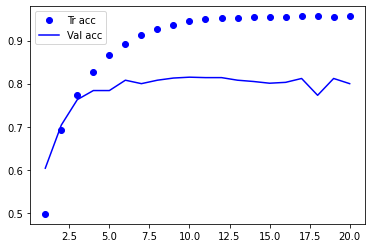

In [0]:
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(val_acc_values)+1)

plt.plot(epochs,acc_values,'bo',label='Tr acc')
plt.plot(epochs,val_acc_values,'b',label='Val acc')
plt.legend()
plt.show()

In [21]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,one_hot_train_labels, batch_size=512,epochs=11)
res=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/11
8982/8982 [==============================] - 1s 58us/step - loss: 2.4782 - accuracy: 0.5595
Epoch 2/11
8982/8982 [==============================] - 0s 54us/step - loss: 1.3441 - accuracy: 0.7164
Epoch 3/11
8982/8982 [==============================] - 0s 53us/step - loss: 1.0039 - accuracy: 0.7796
Epoch 4/11
8982/8982 [==============================] - 0s 52us/step - loss: 0.7841 - accuracy: 0.8324
Epoch 5/11
8982/8982 [==============================] - 1s 56us/step - loss: 0.6232 - accuracy: 0.8715
Epoch 6/11
8982/8982 [==============================] - 0s 54us/step - loss: 0.4961 - accuracy: 0.9000
Epoch 7/11
8982/8982 [==============================] - 0s 52us/step - loss: 0.3982 - accuracy: 0.9145
Epoch 8/11
8982/8982 [==============================] - 0s 53us/step - loss: 0.3244 - accuracy: 0.9313
Epoch 9/11
8982/8982 [==============================] - 0s 53us/step - loss: 0.2716 - accuracy: 0.9384
Epoch 10/11
8982/8982 [==============================] - 0s 54us/step - l

In [22]:
res

[0.987148986368018, 0.7978628873825073]

In [23]:
model.metrics_names

['loss', 'accuracy']